In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../../tools")
from plot_tools import plot_uv_map,plot_map_zoom

base_output="/Odyssey/private/t22picar/multivar_drifter/outputs"
xp_name='unet_uv_drifters_aoml_15m_10y_11d_finescale_med_log'

result_filepath = f"../rec/{xp_name}/daily/unet_rec_2019-07-20.nc"
uv = xr.open_dataset(result_filepath)
utot = uv.ugos
vtot = uv.vgos
norm = utot**2+ vtot**2

In [2]:
# Gulf Stream 
lat_min= 30
lat_max = 50
lon_max = 40
lon_min = -10

zoom_extent=[lon_min,lon_max,lat_min,lat_max]

zoom_ax = [0, 0, 1, 1]

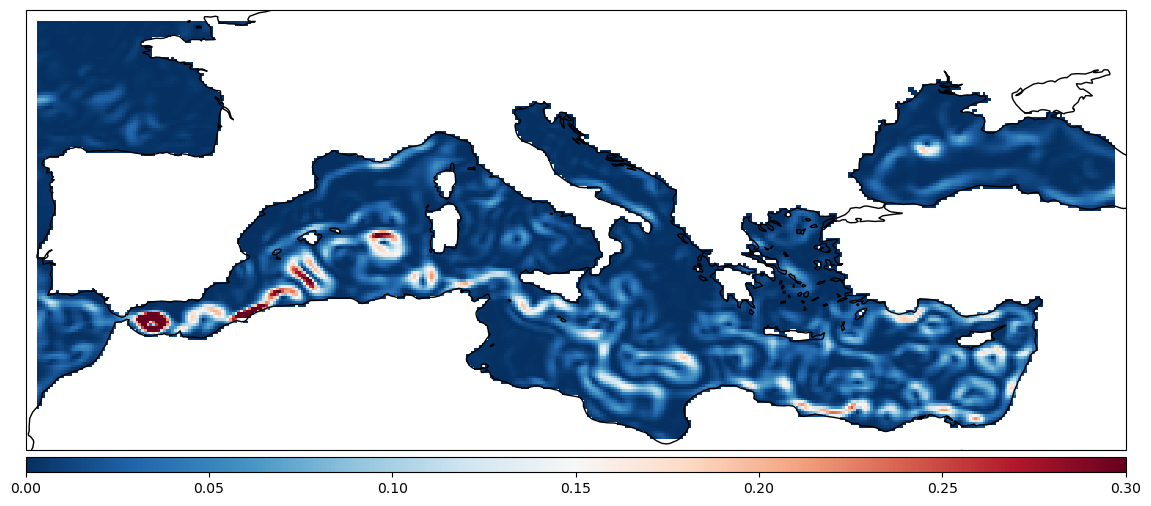

In [3]:
plot_map_zoom(norm,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.3)

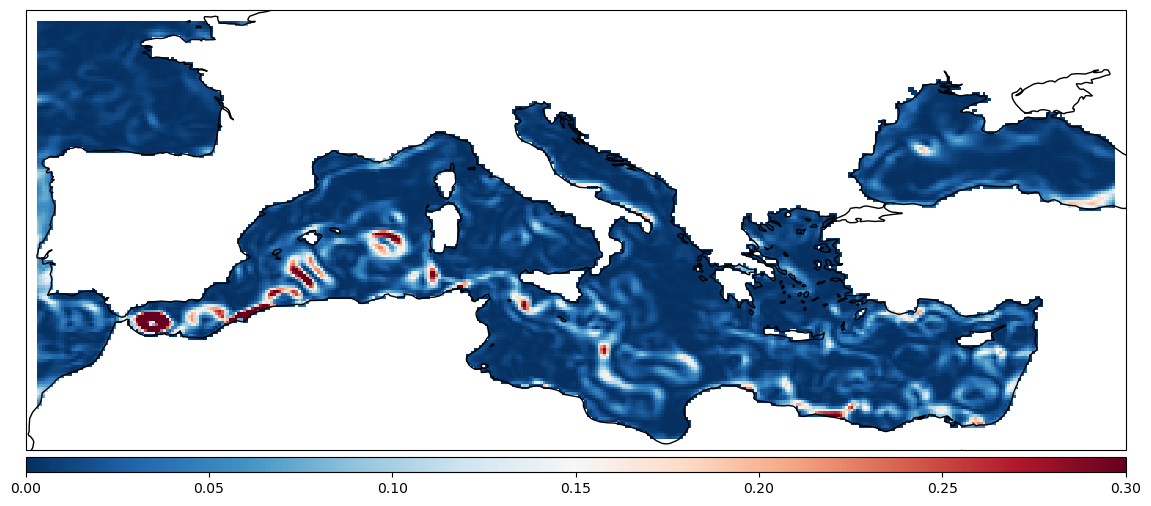

In [8]:
plot_map_zoom(norm,uv.lon,uv.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.3)

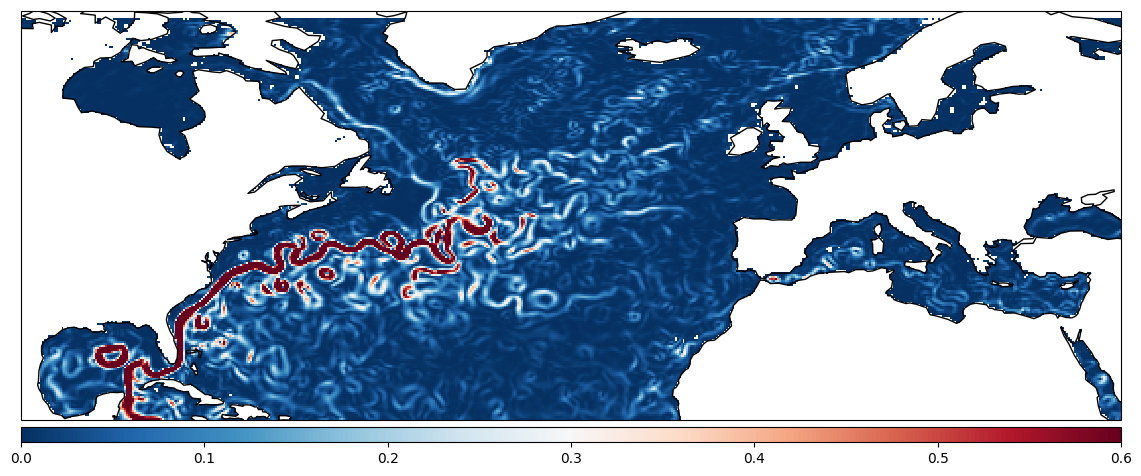

In [4]:

plot_map_zoom(norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=rec_gc.time.values[index],vmin=0,vmax=0.6)

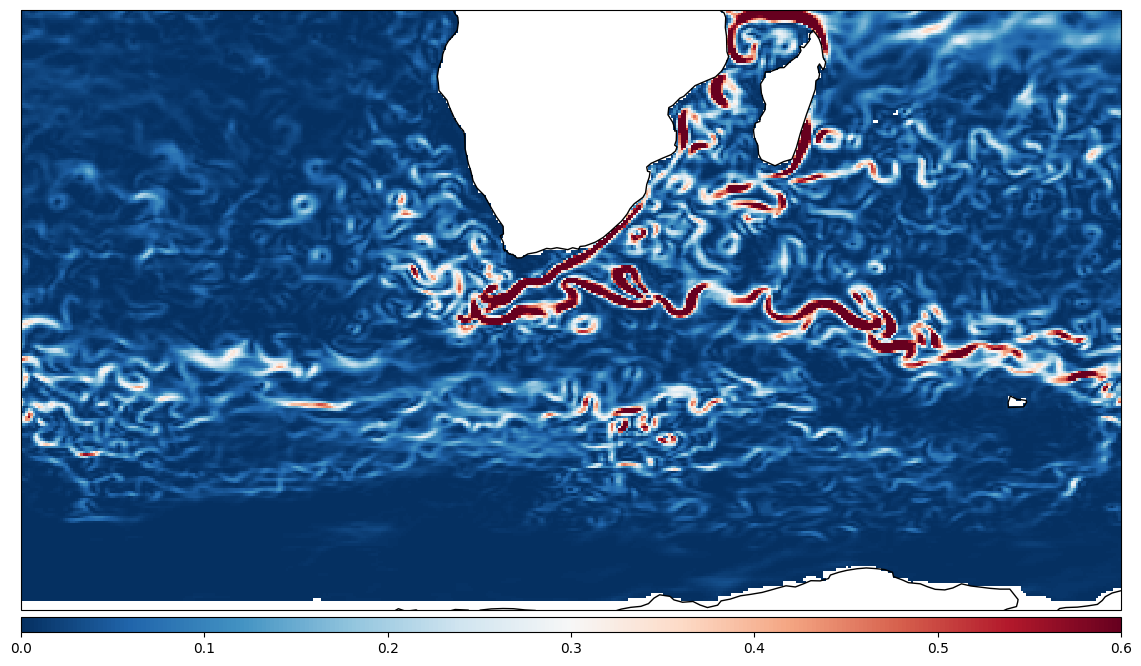

In [9]:
# Agulhas

lat_min= -10
lat_max = -70
lon_max = 80
lon_min = -30

zoom_extent=[lon_min,lon_max,lat_min,lat_max]

#norm = utot.out[index]**2+ vtot.out[index]**2
plot_map_zoom(norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

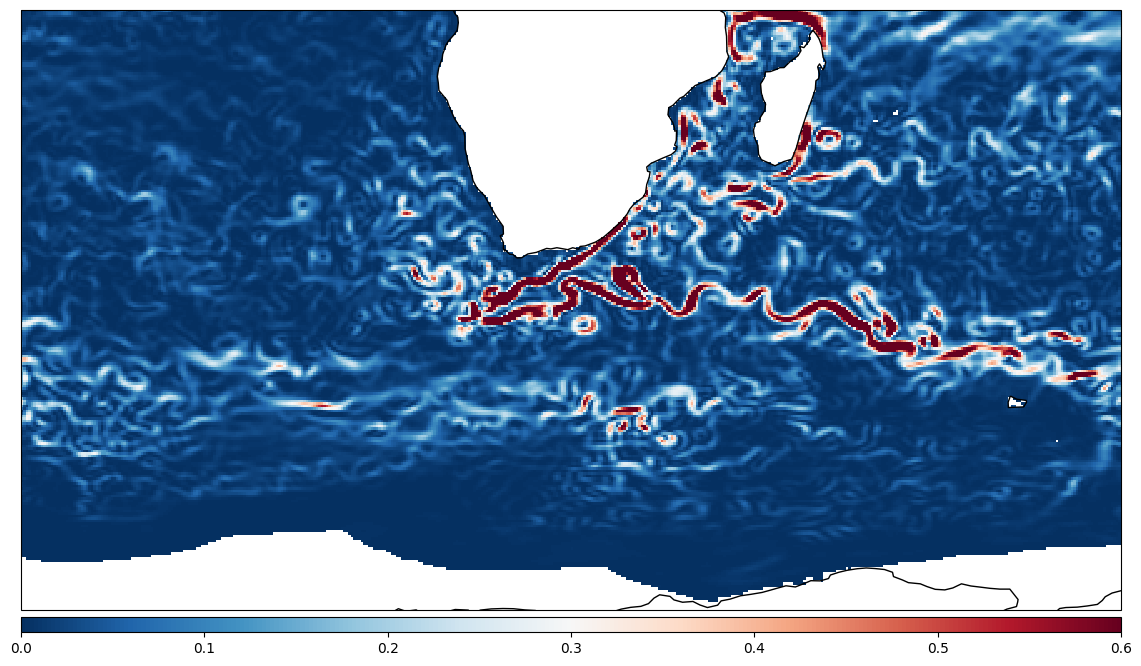

In [11]:
plot_map_zoom(norm_gc,rec_gc.longitude,rec_gc.latitude,zoom_extent=zoom_extent,zoom_ax=zoom_ax,vmin=0,vmax=0.6)

In [59]:
# Comparison with duacs 

duacs =  "/Odyssey/private/t22picar/data/ssh_L4/SSH_L4_CMEMS_2010-01-01-2024-01-01.nc"
duacs = xr.open_dataset(duacs).sel(time="2019-07-20").sel(longitude=slice(lon_min,lon_max)).sel(latitude=slice(lat_min,lat_max))
norm_duacs = duacs.ugos**2 +  duacs.vgos**2

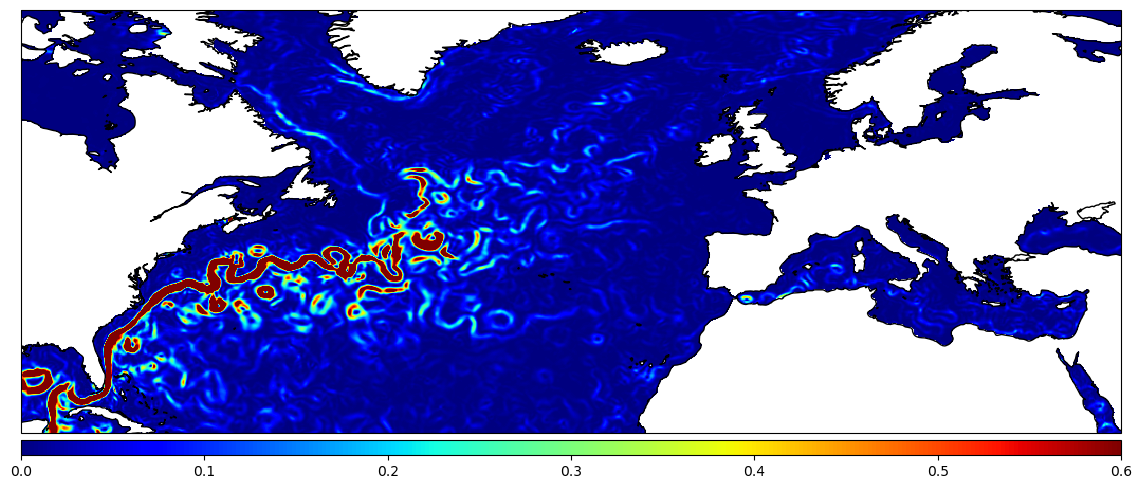

In [60]:
plot_map_zoom(norm_duacs,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=0,vmax=0.6,cmap=plt.cm.jet)

In [61]:
diff_norm = norm.values - norm_duacs.values

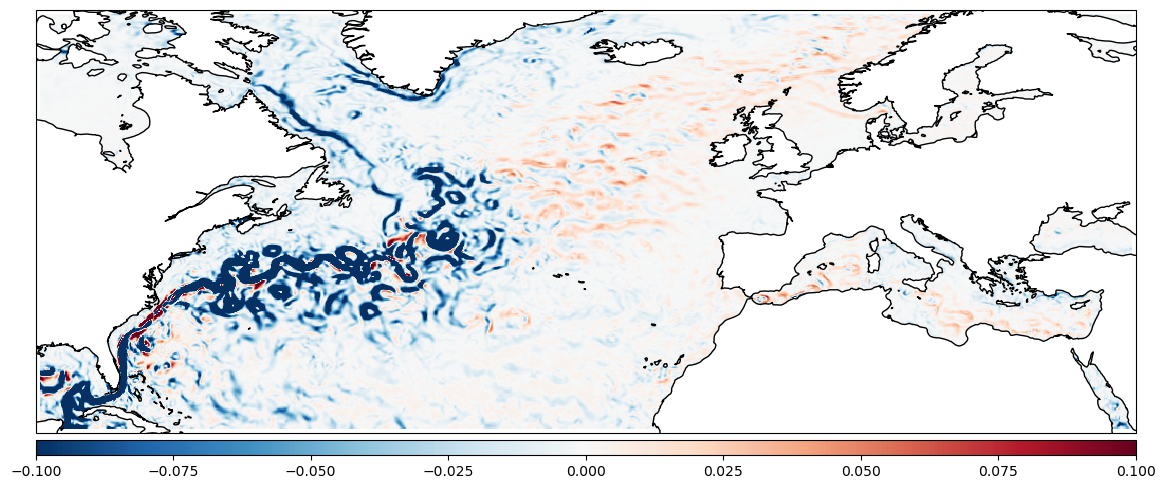

In [62]:
plot_map_zoom(diff_norm,utot.lon,utot.lat,zoom_extent=zoom_extent,zoom_ax=zoom_ax,title=utot.time.values[0],vmin=-0.1,vmax=0.1)